In [ ]:
!pip install python-dotenv huggingface-hub llama-index transformers sentence-transformers llama-index-llms-huggingface llama-index-embeddings-huggingface pdfplumber llama-index-llms-openrouter llama-index-retrievers-bm25 tabula-py  jpype1 pystemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.3/669.3 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6

## 1. Setup & Configuration
In this section, we set up the necessary dependencies, including third-party libraries and API keys.
We also configure the language models (LLMs) and embedding models used throughout the tutorial.

Key Steps:
- Import required Python libraries.
- Load API keys securely from environment variables.
- Initialize the OpenRouter LLMs for both querying and evaluation.
- Set up the HuggingFace embedding model for text representation.
- Apply `nest_asyncio` to handle event loop issues in Jupyter environments.


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # Suppresses TensorFlow warnings
from dotenv import load_dotenv
import Stemmer
import nest_asyncio
import tabula
import pandas as pd
from dotenv import load_dotenv
from llama_index.core import Document
from llama_index.core import (SimpleDirectoryReader, VectorStoreIndex, Settings)
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.llms.openrouter import OpenRouter
import asyncio


load_dotenv()  # Load environment variables from .env file
# ✅ Load API Key Securely (No Hardcoding!)
# api_key = os.getenv("OPENROUTER_API_KEY") 
api_key="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"

if api_key:
    print("✅ API Key Loaded Successfully:", api_key[:5] + "..." + api_key[-5:])
else:
    print("⚠️ API Key is missing! Check your .env file.")


# ✅ Initialize OpenRouter LLM
llm = OpenRouter(api_key=api_key, model="mistralai/mistral-7b-instruct", max_tokens=512, context_window=4096)
Judge_llm = OpenRouter(api_key=api_key, model="qwen/qwen-turbo", max_tokens=512, context_window=4096)
Settings.llm = llm

# ✅ Apply nest_asyncio to fix event loop issues in Jupyter
nest_asyncio.apply()

# ✅ Set up embedding model
embed_model_name = "sentence-transformers/all-MiniLM-L6-v2"
embed_model = HuggingFaceEmbedding(model_name=embed_model_name)
Settings.embed_model = embed_model


✅ API Key Loaded Successfully: sk-or...c8b9e


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## 2. Document Loading & Preprocessing
Here, we load the syllabus document from a PDF file and process it for retrieval.

Key Steps:
- Read the syllabus PDF and extract its textual content.
- Extract tabular data from the PDF using `tabula`.
- Convert the extracted table data into text format.
- Combine the extracted text and tables into a unified document.
- Define an ingestion pipeline to preprocess text by splitting it into manageable chunks and applying embeddings.


In [ ]:
# ✅ Load Course Syllabus Document
pdf_path = "./WebMD.pdf"
documents = SimpleDirectoryReader(input_files=[pdf_path]).load_data()

# Convert table data into an additional Document
tables = tabula.read_pdf(pdf_path, pages="all")
table_docs = [df.to_markdown(index=False) for df in tables]
all_tables_text = "\n\n".join(table_docs)
document_from_tables = Document(text=all_tables_text)

# Combine original + table doc
documents = documents + [document_from_tables]

# ✅ Create the pipeline with transformations
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.ingestion import IngestionPipeline

pipeline = IngestionPipeline(transformations=[SentenceSplitter(chunk_size=256, chunk_overlap=0), embed_model])

# Run the pipeline
nodes = pipeline.run(documents=documents)


## 3. Indexing & Retrieval
Once the document is processed, we create multiple retrievers for efficient information retrieval.

Key Steps:
- Build a `VectorStoreIndex` from the preprocessed document chunks.
- Implement different retrieval methods:
  - **Base Retriever:** Retrieves the most relevant document chunk.
  - **AutoMerging Retriever:** Aggregates multiple related chunks before returning results.
  - **BM25 Retriever:** Uses term frequency-based ranking (a traditional information retrieval method).
  - **Hybrid Fusion Retriever:** (Task 4)
- Define retrieval hyperparameters, such as similarity threshold and number of top results to return.


In [ ]:
# ✅ Create Vector Index and Query Engine
index = VectorStoreIndex(nodes)
query_engine = index.as_query_engine()

# ✅ Create base retrievers
base_retriever = index.as_retriever(similarity_top_k=1)

from llama_index.core.retrievers import AutoMergingRetriever
auto_base_retriever = index.as_retriever(similarity_top_k=3)
auto_merging_retriever = AutoMergingRetriever(auto_base_retriever, index.storage_context)

from llama_index.retrievers.bm25 import BM25Retriever
bm25_retriever = BM25Retriever.from_defaults(nodes=nodes, similarity_top_k=2, stemmer=Stemmer.Stemmer("english"), language="english")

# ❓ Create Hybrid Fusion Retriever (Task 4)



DEBUG:bm25s:Building index from IDs objects


## 4. Query Engines & Evaluation Setup
In this section, we configure the query engines and set up evaluation metrics to assess retriever performance.

Key Steps:
- Instantiate query engines for each retrieval method to allow direct querying.
- Define evaluation models to measure:
  - **Faithfulness:** Whether the retrieved information is accurate and grounded in the original document.
  - **Relevancy:** Whether the retrieved information is relevant to the query.
- Configure different retriever evaluators to assess retrieval effectiveness using metrics such as:
  - Mean Reciprocal Rank (MRR)
  - Hit Rate
  - Precision
  - Recall


In [ ]:
# ✅ Create query engines
from llama_index.core.query_engine import RetrieverQueryEngine

base_query_engine = RetrieverQueryEngine.from_args(base_retriever)
auto_query_engine = RetrieverQueryEngine.from_args(auto_merging_retriever)
bm25_query_engine = RetrieverQueryEngine.from_args(bm25_retriever)

# ✅ Initialize Evaluators
from llama_index.core.evaluation import FaithfulnessEvaluator, RelevancyEvaluator, RetrieverEvaluator

faithfulness_evaluator = FaithfulnessEvaluator(llm=Judge_llm)
relevancy_evaluator = RelevancyEvaluator(llm=Judge_llm)

# ✅ Define retriever evaluators
base_retriever_evaluator = RetrieverEvaluator.from_metric_names(["mrr", "hit_rate", "precision", "recall"], retriever=base_retriever)
auto_retriever_evaluator = RetrieverEvaluator.from_metric_names(["mrr", "hit_rate", "precision", "recall"], retriever=auto_merging_retriever)
bm25_retriever_evaluator = RetrieverEvaluator.from_metric_names(["mrr", "hit_rate", "precision", "recall"], retriever=bm25_retriever)


## 5. Preparing Evaluation Questions & Display Functions

In this section, we define a set of evaluation questions to systematically assess the performance of different retrieval methods. Additionally, we create utility functions for displaying results in a structured and readable format.

Key Steps:
- Define a set of test queries (e.g., syllabus-related questions).
- Generate question-context pairs for automated evaluation.

To make evaluation results more interpretable, we define:
- **`displayify_df(df)`** – A helper function to format and display DataFrames neatly in Jupyter notebooks.
- **`display_retriever_eval_results(name, eval_results)`** – Computes and prints key retrieval evaluation metrics.

In [ ]:
# ✅ Use Evaluation Questions
eval_questions = []
with open('web_questions.txt', 'r') as file:
    for line in file:
        eval_questions.append(line.strip())


# ✅ Add more evaluation questions
eval_questions = [
    "How can a student request a regrade?",
    "What topic is covered in Week 3?",
    "What's happening on Jan 21?"
]

from llama_index.core.evaluation import generate_question_context_pairs
qa_dataset = generate_question_context_pairs(nodes=nodes, llm=llm, num_questions_per_chunk=1)



# ✅ Pretty Display Function
def displayify_df(df):
    """For pretty displaying DataFrame in a notebook."""
    display_df = df.style.set_properties(
        **{
            "inline-size": "300px",
            "overflow-wrap": "break-word",
        }
    )
    display(display_df)

# Helper to display retrieval metrics
def display_retriever_eval_results(name, eval_results):
    """Build a small DataFrame summarizing retrieval metrics across queries."""
    print(f"=== {name} ===")
    metric_dicts = [res.metric_vals_dict for res in eval_results]
    if not metric_dicts:
        print("No retriever metrics found!")
        return
    df = pd.DataFrame(metric_dicts)
    #displayify_df(df)
    print("Mean:\n", df.mean(numeric_only=True), "\n")

100%|██████████| 74/74 [04:18<00:00,  3.50s/it]


## 6. Running Evaluations & Comparing Retrievers
Finally, we conduct retrieval evaluations and compare the effectiveness of different retrieval strategies.

Key Steps:
- Execute retrieval on all retrievers (Base, AutoMerging, BM25, Hybrid Fusion).
- Assess each retriever's faithfulness and relevancy scores.
- Compare retrieval results by averaging the evaluation metrics.
- Display results in tabular format for easy comparison.

This step helps determine which retrieval method performs best for a given dataset.


In [ ]:
# ✅ Modify Evaluation to Include Fusion Retriever
async def run_evaluation():
    eval_results = []

    for query in web_questions:
        # Retrieve responses from all four retrievers
        base_response = base_query_engine.query(query)
        auto_response = auto_query_engine.query(query)
        bm25_response = bm25_query_engine.query(query)

        base_text = base_response.response
        auto_text = auto_response.response
        bm25_text = bm25_response.response

        base_contexts = "\n".join([node.get_content() for node in base_response.source_nodes])
        auto_contexts = "\n".join([node.get_content() for node in auto_response.source_nodes])
        bm25_contexts = "\n".join([node.get_content() for node in bm25_response.source_nodes])

        # Evaluate Faithfulness & Relevancy for each retriever
        base_faithfulness = faithfulness_evaluator.evaluate_response(response=base_response)
        auto_faithfulness = faithfulness_evaluator.evaluate_response(response=auto_response)
        bm25_faithfulness = faithfulness_evaluator.evaluate_response(response=bm25_response)

        base_relevancy = relevancy_evaluator.evaluate_response(query=query, response=base_response)
        auto_relevancy = relevancy_evaluator.evaluate_response(query=query, response=auto_response)
        bm25_relevancy = relevancy_evaluator.evaluate_response(query=query, response=bm25_response)

        eval_results.append({
            "Query": query,
            "Base Response": base_text,
            "Auto-Merged Response": auto_text,
            "BM25 Response": bm25_text,
            "Base Context": "".join(base_contexts[:100]) + "... " + "".join(base_contexts[-100:]),
            "Auto Context": "".join(auto_contexts[:100]) + "... " + "".join(auto_contexts[-100:]),
            "BM25 Context": "".join(bm25_contexts[:100]) + "... " + "".join(bm25_contexts[-100:]),
            "Base Faithfulness": base_faithfulness.score,
            "Auto Faithfulness": auto_faithfulness.score,
            "BM25 Faithfulness": bm25_faithfulness.score,
            "Base Relevancy": base_relevancy.score,
            "Auto Relevancy": auto_relevancy.score,
            "BM25 Relevancy": bm25_relevancy.score,
        })

    df = pd.DataFrame(eval_results)

    # Compute means for comparison
    print("\n✅ Faithfulness Comparison")
    print(f"Base Retriever: {df['Base Faithfulness'].mean():.4f}")
    print(f"Auto-Merging Retriever: {df['Auto Faithfulness'].mean():.4f}")
    print(f"BM25 Retriever: {df['BM25 Faithfulness'].mean():.4f}")

    print("\n✅ Relevancy Comparison")
    print(f"Base Retriever: {df['Base Relevancy'].mean():.4f}")
    print(f"Auto-Merging Retriever: {df['Auto Relevancy'].mean():.4f}")
    print(f"BM25 Retriever: {df['BM25 Relevancy'].mean():.4f}")

    # Evaluate all retrievers on the QA dataset
    base_eval_results = await base_retriever_evaluator.aevaluate_dataset(qa_dataset)
    auto_eval_results = await auto_retriever_evaluator.aevaluate_dataset(qa_dataset)
    bm25_eval_results = await bm25_retriever_evaluator.aevaluate_dataset(qa_dataset)

    print("=== Retrieval Metrics Comparison ===")
    display_retriever_eval_results("Base Retriever", base_eval_results)
    display_retriever_eval_results("Auto-Merging Retriever", auto_eval_results)
    display_retriever_eval_results("BM25 Retriever", bm25_eval_results)

    # Display results table
    displayify_df(df)

# ✅ Execute Async Evaluation
asyncio.run(run_evaluation())


✅ Faithfulness Comparison
Base Retriever: 1.0000
Auto-Merging Retriever: 1.0000
BM25 Retriever: 0.7500

✅ Relevancy Comparison
Base Retriever: 1.0000
Auto-Merging Retriever: 1.0000
BM25 Retriever: 0.7500
=== Retrieval Metrics Comparison ===
=== Base Retriever ===
Mean:
 mrr          0.27027
hit_rate     0.27027
precision    0.27027
recall       0.27027
dtype: float64 

=== Auto-Merging Retriever ===
Mean:
 mrr          0.308559
hit_rate     0.351351
precision    0.115991
recall       0.351351
dtype: float64 

=== BM25 Retriever ===
Mean:
 mrr          0.358108
hit_rate     0.391892
precision    0.195946
recall       0.391892
dtype: float64 



,Query,Base Response,Auto-Merged Response,BM25 Response,Base Context,Auto Context,BM25 Context,Base Faithfulness,Auto Faithfulness,BM25 Faithfulness,Base Relevancy,Auto Relevancy,BM25 Relevancy
0,Are there any non-medication treatments for migraines?,"Yes, there are non-medication treatments for migraines. Some options include nerve stimulation, biofeedback, transcranial magnetic stimulation, and acupuncture.","Yes, there are non-medication treatments for migraines. Some options include nerve stimulation, biofeedback, transcranial magnetic stimulation, and acupuncture. These treatments are mentioned in the context provided.","Based on the provided context, the document discusses a medication called VYEPTI for migraines. However, it does not provide information about non-medication treatments for migraines. For a comprehensive list of non-medication treatments, it would be best to consult a healthcare professional or a reliable health information source.","which interact with brain chemicals that could be causing headaches • Tricyclic antidepressants, s... ur doctor about nerve stimulation, biofeedback, transcranial magnetic stimulation, and acupuncture.","which interact with brain chemicals that could be causing headaches • Tricyclic antidepressants, s... like I do my patients—with compas - sion and love. These days, I treat myself like my best friend.",202522 /gid00010/gid00015/gid00020/gid00010/gid00005/gid00006/gid00001/gid00021/gid00009/gid00006/gi... . Y ou mav report side effects to FDA at ӣӣFDAӣ. What should I tell my health care provider?,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
1,When should I not take VYEPTI?,"You should not take VYEPTI if you are pregnant or plan to become pregnant, as it is not known if VYEPTI will harm your unborn baby. Additionally, it is not recommended for individuals under 18 years of age, as it is not known if VYEPTI is safe and effective in children. Always consult with your healthcare provider before taking any medication.","You should not take VYEPTI if you are allergic to eptinezumab-jjmr or any of the ingredients in VYEPTI, or if you are pregnant or plan to become pregnant, as it is not known if VYEPTI will harm your unborn baby. Additionally, it is not known if VYEPTI passes into breast milk, so you should not take it if you are breastfeeding. Lastly, VYEPTI is not approved for use in children under 18 years of age. Always consult with your healthcare provider before starting any new medication.",You should not take VYEPTI if you are allergic to eptinezumab-jjmr or any of the ingredients in VYEPTI.,"Before you receive VYEPTI: Tell your healthcare provider about all of your medical conditions, inclu... All rights reserved. Vyepti is a registered trademark of Lundbeck Seattle BioPharmaceuticals, Inc.","Before you receive VYEPTI: Tell your healthcare provider about all of your medical conditions, inclu... by a healthcare provider as an intravenous infusion every 3 months. When should I not take VYEPTI?",/gid00020/gid00006/gid00004/gid00021/gid00010/gid00016/gid00015/gid00001/gid00001/gid00021/gid00016/... . Y ou mav report side effects to FDA at ӣӣFDAӣ. What should I tell my health care provider?,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,What are the symptoms of Cluster?,"The symptoms of Cluster, as provided in the context, include Lacrimation (tearing), Nasal congestion, and Rhinorrhea (runny nose).","The symptoms of Cluster headaches include severe to very severe pain located in the orbital, supraorbital, and/or temporal areas. Other symptoms may include lacrimation (tearing), nasal congestion, rhinorrhea (runny nose), and restlessness/agitation. In some cases, ptosis (drooping of the eyelid) and/or eyelid edema (swelling) may also occur.","The symptoms of Cluster headaches include lacrimation (tearing), nasal congestion, rhinorrhea (runny nose), and potentially ptosis (drooping of the eyelid) and eyelid edema (swelling). Additionally, restlessn

## Task 1 : Optimizing the Ingestion Pipeline for Medical Documents

### 1.1 Document Loading & Preprocessing

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y poppler-utils
!pip install pytesseract pdfplumber tabula-py pdf2image

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,317 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,610 kB]
Get:13 http://archive.ubuntu.com/ubuntu ja

In [34]:
from llama_index.core.node_parser import SemanticSplitterNodeParser, SentenceSplitter
from llama_index.core.ingestion import IngestionPipeline
import pdfplumber
import pytesseract
from pdf2image import convert_from_path
import tabula

# ✅ Load WebMD PDF
webmd_pdf_path = "./WebMD.pdf"

# ✅ Extract text using pdfplumber (Handles encoding issues)
def extract_text_from_pdf(pdf_path):
    text_list = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            if text:
                text_list.append(text)
    return "\n\n".join(text_list)

pdf_text = extract_text_from_pdf(webmd_pdf_path)

# ✅ Extract images and apply OCR
def extract_text_from_images(pdf_path):
    images = convert_from_path(pdf_path)
    ocr_texts = []
    for i, img in enumerate(images):
        text = pytesseract.image_to_string(img)
        if text.strip():
            ocr_texts.append(f"Page {i+1} OCR:\n{text}")
    return "\n\n".join(ocr_texts)

ocr_text = extract_text_from_images(webmd_pdf_path)

# ✅ Extract tables using tabula
webmd_tables = tabula.read_pdf(webmd_pdf_path, pages="all", stream=True, multiple_tables=True)
webmd_table_texts = [df.to_markdown(index=False) for df in webmd_tables]

# ✅ Combine extracted text sources
all_text = "\n\n".join([pdf_text, ocr_text] + webmd_table_texts)
webmd_documents = [Document(text=all_text)]

# ✅ Create ingestion pipeline with paragraph-based splitting
paragraph_splitter = SemanticSplitterNodeParser(embed_model=embed_model, include_metadata=True, include_prev_next_rel=True)
pipeline_semantic = IngestionPipeline(transformations=[paragraph_splitter, embed_model])
nodes_semantic = pipeline_semantic.run(documents=webmd_documents)

### 1.2 Indexing & Retrieval

In [ ]:
# ✅ Create Vector Index and Query Engine
index_sema = VectorStoreIndex(nodes_semantic)
query_engine_sema = index_sema.as_query_engine()

# ✅ Create base retrievers
base_retriever_sema = index_sema.as_retriever(similarity_top_k=1)

from llama_index.core.retrievers import AutoMergingRetriever
auto_base_retriever_sema = index_sema.as_retriever(similarity_top_k=3)
auto_merging_retriever_sema = AutoMergingRetriever(auto_base_retriever_sema, index_sema.storage_context)

from llama_index.retrievers.bm25 import BM25Retriever
bm25_retriever_sema = BM25Retriever.from_defaults(nodes=nodes_semantic, similarity_top_k=2, stemmer=Stemmer.Stemmer("english"), language="english")


DEBUG:bm25s:Building index from IDs objects


Run retrieval queries

In [ ]:
# Define the questions
questions = [
    "Are there any non-medication treatments for migraines?",
    "When should I not take VYEPTI?",
    "What are the symptoms of Cluster?",
    "If you have more than how many headache days per month you need to take a multipronged approach to treatment?"
]

# Query both engines for each question
for question in questions:
    print(f"Question: {question}")

    # Query with basic sentence pipeline
    response_engine = query_engine.query(question)
    print("Response with basic sentence pipeline:", response_engine)

    # Query with optimized pipeline
    response_sema = query_engine_sema.query(question)
    print("Response with optimized pipeline:", response_sema)

    print("\n" + "="*50 + "\n")


Question: Are there any non-medication treatments for migraines?
Response with basic sentence pipeline:  Yes, there are non-medication treatments for migraines. Some options include nerve stimulation, biofeedback, transcranial magnetic stimulation, and acupuncture. These treatments can be discussed with a healthcare provider.
Response with optimized pipeline:  Yes, there are non-medication treatments for migraines. Some nondrug options might also help with chronic migraine. Ask your doctor about nerve stimulation, biofeedback, transcranial magnetic stimulation, and acupuncture. (Source: WebMD)


Question: When should I not take VYEPTI?
Response with basic sentence pipeline:  You should not take VYEPTI if you are allergic to eptinezumab-jjmr or any of the ingredients in VYEPTI, or if you are pregnant or plan to become pregnant, as it is not known if VYEPTI will harm your unborn baby. Additionally, it is not known if VYEPTI passes into breast milk, so you should not take it if you are br

### 1.3 Query Engines & Evaluation Setup

In [ ]:
# ✅ Create query engines
from llama_index.core.query_engine import RetrieverQueryEngine

base_query_engine_sema = RetrieverQueryEngine.from_args(base_retriever_sema)
auto_query_engine_sema = RetrieverQueryEngine.from_args(auto_merging_retriever_sema)
bm25_query_engine_sema = RetrieverQueryEngine.from_args(bm25_retriever_sema)

# ✅ Initialize Evaluators
from llama_index.core.evaluation import FaithfulnessEvaluator, RelevancyEvaluator, RetrieverEvaluator

faithfulness_evaluator_sema = FaithfulnessEvaluator(llm=Judge_llm)
relevancy_evaluator_sema = RelevancyEvaluator(llm=Judge_llm)

# ✅ Define retriever evaluators
base_retriever_evaluator_sema = RetrieverEvaluator.from_metric_names(["mrr", "hit_rate", "precision", "recall"], retriever=base_retriever_sema)
auto_retriever_evaluator_sema = RetrieverEvaluator.from_metric_names(["mrr", "hit_rate", "precision", "recall"], retriever=auto_merging_retriever_sema)
bm25_retriever_evaluator_sema = RetrieverEvaluator.from_metric_names(["mrr", "hit_rate", "precision", "recall"], retriever=bm25_retriever_sema)


### 1.4 Preparing Evaluation Questions & Display Functions

In [ ]:
# ✅ Use Evaluation Questions
web_questions = []
with open('web_questions.txt', 'r') as file:
    for line in file:
        web_questions.append(line.strip())


from llama_index.core.evaluation import generate_question_context_pairs
qa_dataset_sema = generate_question_context_pairs(nodes=nodes_semantic, llm=llm, num_questions_per_chunk=1)

# ✅ Pretty Display Function
def displayify_df(df):
    """For pretty displaying DataFrame in a notebook."""
    display_df = df.style.set_properties(
        **{
            "inline-size": "300px",
            "overflow-wrap": "break-word",
        }
    )
    display(display_df)

# Helper to display retrieval metrics
def display_retriever_eval_results(name, eval_results):
    """Build a small DataFrame summarizing retrieval metrics across queries."""
    print(f"=== {name} ===")
    metric_dicts = [res.metric_vals_dict for res in eval_results]
    if not metric_dicts:
        print("No retriever metrics found!")
        return
    df = pd.DataFrame(metric_dicts)
    #displayify_df(df)
    print("Mean:\n", df.mean(numeric_only=True), "\n")

100%|██████████| 17/17 [01:14<00:00,  4.37s/it]


### 1.5 Running Evaluations & Comparing Retrievers

In [ ]:
# ✅ Modify Evaluation to Include Fusion Retriever
async def run_evaluation_sema():
    eval_results = []

    for query in web_questions:
        # Retrieve responses from all four retrievers
        base_response = base_query_engine_sema.query(query)
        auto_response = auto_query_engine_sema.query(query)
        bm25_response = bm25_query_engine_sema.query(query)

        base_text = base_response.response
        auto_text = auto_response.response
        bm25_text = bm25_response.response


        # Evaluate Faithfulness & Relevancy for each retriever
        base_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=base_response)
        auto_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=auto_response)
        bm25_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=bm25_response)

        base_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=base_response)
        auto_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=auto_response)
        bm25_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=bm25_response)

        eval_results.append({
            "Query": query,
            "Base Response": base_text,
            "Auto-Merged Response": auto_text,
            "BM25 Response": bm25_text,
            "Base Faithfulness": base_faithfulness.score,
            "Auto Faithfulness": auto_faithfulness.score,
            "BM25 Faithfulness": bm25_faithfulness.score,
            "Base Relevancy": base_relevancy.score,
            "Auto Relevancy": auto_relevancy.score,
            "BM25 Relevancy": bm25_relevancy.score,
        })

    df = pd.DataFrame(eval_results)

    # Compute means for comparison
    print("\n✅ Faithfulness Comparison")
    print(f"Base Retriever: {df['Base Faithfulness'].mean():.4f}")
    print(f"Auto-Merging Retriever: {df['Auto Faithfulness'].mean():.4f}")
    print(f"BM25 Retriever: {df['BM25 Faithfulness'].mean():.4f}")

    print("\n✅ Relevancy Comparison")
    print(f"Base Retriever: {df['Base Relevancy'].mean():.4f}")
    print(f"Auto-Merging Retriever: {df['Auto Relevancy'].mean():.4f}")
    print(f"BM25 Retriever: {df['BM25 Relevancy'].mean():.4f}")

    # Evaluate all retrievers on the QA dataset
    base_eval_results = await base_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)
    auto_eval_results = await auto_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)
    bm25_eval_results = await bm25_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)

    print("=== Retrieval Metrics Comparison ===")
    display_retriever_eval_results("Base Retriever", base_eval_results)
    display_retriever_eval_results("Auto-Merging Retriever", auto_eval_results)
    display_retriever_eval_results("BM25 Retriever", bm25_eval_results)

    # Display results table
    displayify_df(df)

# ✅ Execute Async Evaluation
asyncio.run(run_evaluation_sema())


✅ Faithfulness Comparison
Base Retriever: 0.5000
Auto-Merging Retriever: 0.5000
BM25 Retriever: 0.7500

✅ Relevancy Comparison
Base Retriever: 1.0000
Auto-Merging Retriever: 1.0000
BM25 Retriever: 0.7500
=== Retrieval Metrics Comparison ===
=== Base Retriever ===
Mean:
 mrr          0.411765
hit_rate     0.411765
precision    0.411765
recall       0.411765
dtype: float64 

=== Auto-Merging Retriever ===
Mean:
 mrr          0.617647
hit_rate     0.823529
precision    0.264706
recall       0.823529
dtype: float64 

=== BM25 Retriever ===
Mean:
 mrr          0.411765
hit_rate     0.529412
precision    0.264706
recall       0.529412
dtype: float64 



,Query,Base Response,Auto-Merged Response,BM25 Response,Base Faithfulness,Auto Faithfulness,BM25 Faithfulness,Base Relevancy,Auto Relevancy,BM25 Relevancy
0,Are there any non-medication treatments for migraines?,"Yes, there are non-drug procedures mentioned for migraines. These include nerve stimulation, biofeedback, transcranial magnetic stimulation, and acupuncture.","Yes, there are non-medication treatments available for migraines. Some non-drug options that might be beneficial for chronic migraine include nerve stimulation, biofeedback, transcranial magnetic stimulation, and acupuncture. It's essential to discuss these options with your doctor to determine if they could be suitable for your condition.","Yes, there are non-medication treatments for migraines. The context provided mentions several non-medication treatments such as meditation, prayer, energy work, support groups, herbs, and supplements. The individual in the story also mentions that these have worked for her patients with migraines. Additionally, lifestyle changes like diet, exercise, and sleep are also mentioned as important factors in managing chronic migraines.",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,When should I not take VYEPTI?,You should not take VYEPTI if you are allergic to eptinezumab-jjmr or any of the ingredients in VYEPTI.,It is recommended not to take VYEPTI if you have an allergy to eptinezumab-jjmr or any of the components in the medication.,You should not take VYEPTI if you are allergic to eptinezumab-jjmr or any of the ingredients in VYEPTI.,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,What are the symptoms of Cluster?,"The symptoms of Cluster headaches include: 1. Unilateral (one-sided) location 2. Orbital, supraorbital, and/or temporal pain 3. Severe to very severe intensity 4. Duration of 15-180 minutes 5. Lacrimation (tearing) 6. Nasal congestion 7. Rhinorrhea (runny nose) 8. Ptosis and/or eyelid edema (swelling) 9. Restlessness/agitation 10. Nausea 11. Vomiting 12. Photophobia (sensitivity to light) 13. Phonophobia (sensitivity to sound)","The symptoms of Cluster headache include: 1. Unilateral (one-sided) location 2. Orbital, supraorbital, and/or temporal pain 3. Severe to very severe intensity 4. Duration of 15-180 minutes 5. Aggravating factors may include lacrimation, nasal congestion, rhinorrhea, ptosis and/or eyelid edema, restlessness/agitation, nausea, and vomiting.",Cluster headaches are characterized by the following symptoms: 1. Unilateral (one-sided) pain: The pain is usually located around the eye or the temple area on one side of the head. 2. Orbital or supraorbital pain: The pain can be severe and radiates to the eye or the forehead. 3. Lacrimation: Excessive tearing from the affected eye. 4. Nasal congestion: Nasal congestion or runny nose may occur. 5. Rhinorrhea: Runny nose with clear or colored discharge. 6. Ptosis and/or eyelid edema: Drooping of the eyelid and swelling of the eyelid may occur. 7. Restlessness/agitation: Cluster headache sufferers may experience restlessness or agitation during an attack.,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
3,If you have more than how many headache days per month you need to take a multipronged approach to treatment?,You need to take a multipronged approach to treatment if you have 15 or more headache days per month.,Preventive medicine helps cut down the number of headache days you have and might convert chronic migraine to less frequent episodic migraine for people with 15 or more headache days per month.,You need to take a multipronged approach to treatment if you have 15 or more headache days per month.,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


## Task 2: Defining a Comprehensive RAG Test Set

### 2.1  load the test questions

In [ ]:
# ✅ load the test questions
test_questions = []
with open('my_questions.txt', 'r') as file:
    for line in file:
        test_questions.append(line.strip())


### 2.2 Comparing test set


✅ Test Question Response Comparison

👑 Question 1: Structured data retrieval: What does the figure on migraine risk factors illustrate?
  📌 Base Retriever:  The provided context does not contain specific information about a figure illustrating migraine risk factors. However, it mentions that changes in barometric pressure are a known trigger of migraines and contributors to pain severity. This suggests that barometric pressure could be a risk factor for migraines. Additionally, the context mentions that stress, sleep quality, and energy levels are factors that may predict migraine attacks. These factors could also be considered as risk factors for migraines.
  📌 Auto-Merging Retriever:  The provided context does not contain a figure illustrating migraine risk factors. The context only discusses the potential for a phone app to predict migraine attacks based on factors like sleep quality, energy levels, and stress, and mentions that changes in barometric pressure can be a known trigger

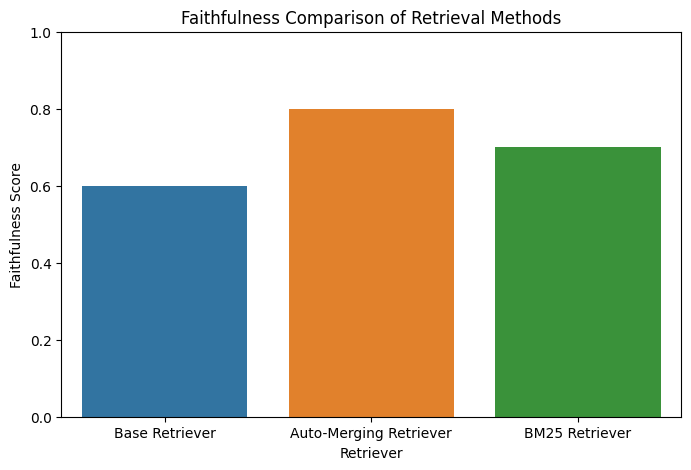


👑 Question 2: Structured data retrieval: According to the table, what is the typical duration of a migraine attack?
  📌 Base Retriever:  The provided context does not contain a table. However, it does mention that a migraine episode typically lasts between 4 to 72 hours, according to the World Health Organization.
  📌 Auto-Merging Retriever:  The typical duration of a migraine attack is 4 to 72 hours.
  📌 BM25 Retriever:  The typical duration of a migraine attack is 4 to 72 hours.
--------------------------------------------------------------------------------

✅ Faithfulness Comparison
Base Retriever: 0.5000
Auto-Merging Retriever: 0.6000
BM25 Retriever: 0.7000

✅ Relevancy Comparison
Base Retriever: 0.6000
Auto-Merging Retriever: 0.7000
BM25 Retriever: 0.6000

=== Retrieval Metrics Comparison ===
=== Base Retriever ===
Mean:
 mrr          0.411765
hit_rate     0.411765
precision    0.411765
recall       0.411765
dtype: float64 

=== Auto-Merging Retriever ===
Mean:
 mrr          0.6

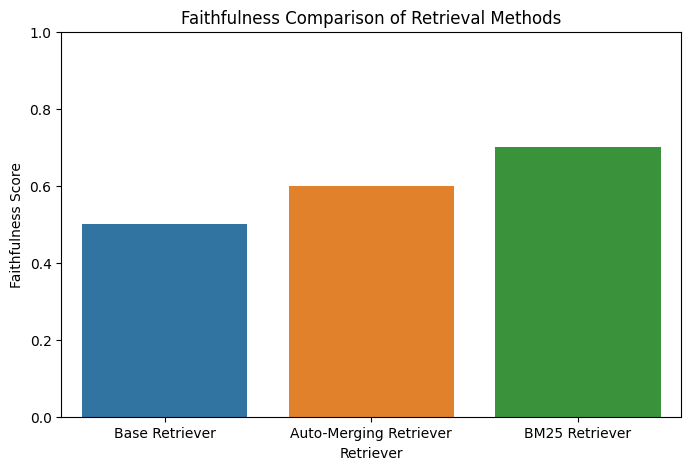


👑 Question 3: Image-based/multimedia-related question: What does the QR code in the document direct users to?
  📌 Base Retriever: The QR code in the document directs users to a video on one woman's journey living with chronic migraine.
  📌 Auto-Merging Retriever:  The QR code in the document directs users to watch a video on one woman’s journey living with chronic migraine.
  📌 BM25 Retriever: The QR code in the document directs users to a video on one woman's journey living with chronic migraine.
--------------------------------------------------------------------------------

✅ Faithfulness Comparison
Base Retriever: 0.5000
Auto-Merging Retriever: 0.7000
BM25 Retriever: 0.7000

✅ Relevancy Comparison
Base Retriever: 0.6000
Auto-Merging Retriever: 0.7000
BM25 Retriever: 0.7000

=== Retrieval Metrics Comparison ===
=== Base Retriever ===
Mean:
 mrr          0.411765
hit_rate     0.411765
precision    0.411765
recall       0.411765
dtype: float64 

=== Auto-Merging Retriever ===
Mean:


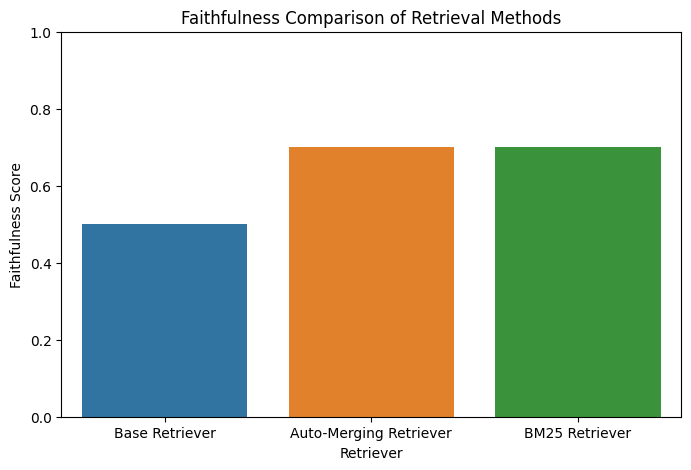


👑 Question 4: Image-based/multimedia-related question: What infographic or visual elements are used to explain migraine symptoms?
  📌 Base Retriever:  The provided context does not contain any infographic or visual elements explaining migraine symptoms. However, it does mention some factors that may contribute to migraine attacks, such as poor sleep, stress, and energy levels. It also mentions that changes in barometric pressure can potentially trigger migraines. These factors are not visualized in an infographic or multimedia format in the provided context.
  📌 Auto-Merging Retriever:  The provided context does not contain any infographic or visual elements that explicitly explain migraine symptoms. However, it does mention that a study tracked several factors such as mood, energy, stress levels, sleep quality, and headaches on a phone app to predict migraine attacks. This could be considered a visual element, as the app would likely have a user interface to input and display these f

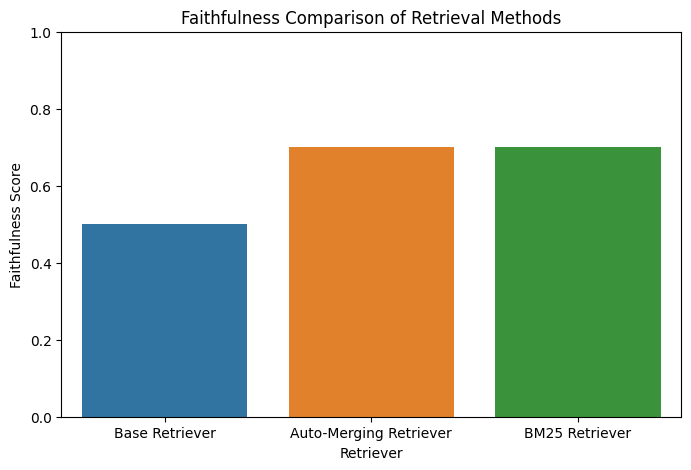


👑 Question 5: Cross-sectional question: What are the different types of headaches, and how do their symptoms differ?
  📌 Base Retriever:  In the provided context, the following types of headaches are mentioned:

1. Migraines: These are characterized by recurring moderate to severe headaches, often accompanied by symptoms such as nausea, vomiting, and sensitivity to light and sound. They can last from a few hours to several days.

   - Anti-seizure medicines like Depakote and sodium valproate, tricyclic antidepressants like amitriptyline, injections of botulinum toxin, and monoclonal antibody treatments like atogepant, eptinezumab, erenumab, fremanezumab, and galcanezumab are some treatments for migraines.

2. Chronic migraines: This is a type of migraine where headaches occur more frequently, typically 15 or more days per month. The symptoms and treatments for chronic migraines are similar to those for migraines, but the focus is on both relief during an attack and prevention of futur

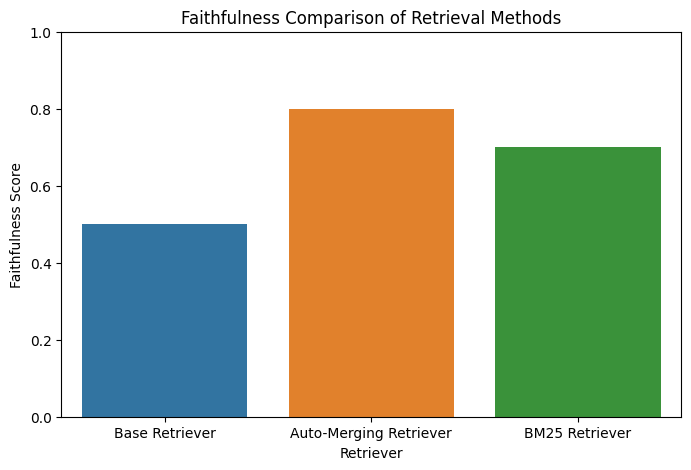


👑 Question 6: Cross-sectional question: What is the relationship between migraines and cardiovascular disorders?
  📌 Base Retriever:  According to the provided context, people who get chronic migraine with aura have a slightly higher risk of heart attack, stroke, and other cardiovascular diseases than people who have migraine with no aura or no migraine disorder at all.
  📌 Auto-Merging Retriever: According to the provided context, people who get chronic migraine with aura have a slightly higher risk of heart attack, stroke, and cardiovascular disease than people who have migraine with no aura or no migraine disorder at all.
  📌 BM25 Retriever:  According to the provided context, there is a slightly higher risk of heart attack, stroke, and cardiovascular disease for people who have chronic migraine with aura compared to those who have migraine with no aura or no migraine disorder at all. This information is sourced from Harvard Health's article titled "Migraine: A Connection to Cardio

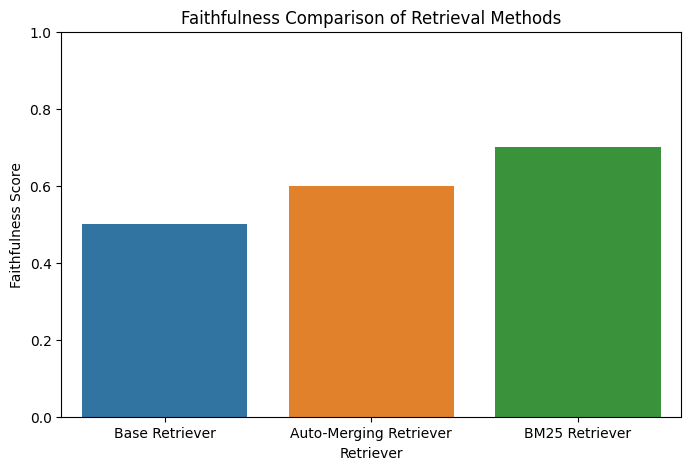


👑 Question 7: Keyword-heavy question: What are the common symptoms of a migraine, including photophobia and phonophobia?
  📌 Base Retriever:  The context provided does not directly mention photophobia (sensitivity to light) and phonophobia (sensitivity to sound) as common symptoms of migraine. However, it does mention that changes in light and sound can be triggers for migraine attacks. The common symptoms mentioned in the context are mood changes, energy levels, stress, sleep quality, and headaches.
  📌 Auto-Merging Retriever:  The context does not provide specific information about photophobia (sensitivity to light) and phonophobia (sensitivity to sound) as common symptoms of migraines. However, it does mention that changes in light and sound can be triggers for migraines. Common symptoms of migraines mentioned in the context include headaches, nausea, vomiting, and sensitivity to smell or odors.
  📌 BM25 Retriever:  Migraines are characterized by unilateral (one-sided) pulsating, m

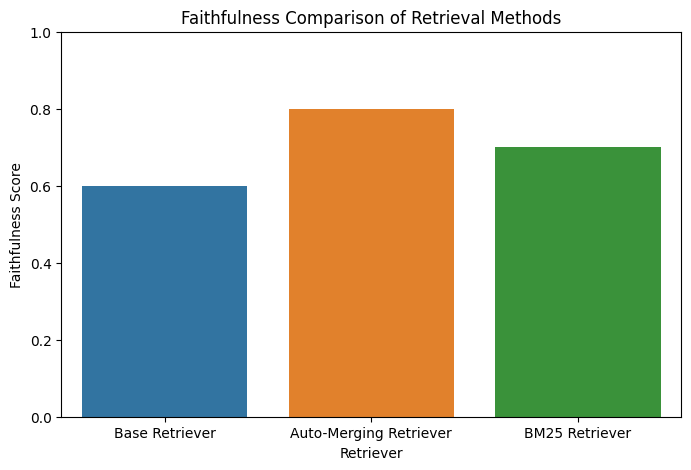


👑 Question 8: Keyword-heavy question: List the side effects of VYEPTI as mentioned in the document.
  📌 Base Retriever:  The side effects of VYEPTI include stuffy nose and scratchy throat, as well as allergic reactions.
  📌 Auto-Merging Retriever:  The side effects of VYEPTI include stuffy nose and scratchy throat, and allergic reactions.
  📌 BM25 Retriever:  The side effects of VYEPTI mentioned in the document include stuffy nose and scratchy throat, as well as allergic reactions.
--------------------------------------------------------------------------------

✅ Faithfulness Comparison
Base Retriever: 0.5000
Auto-Merging Retriever: 0.8000
BM25 Retriever: 0.7000

✅ Relevancy Comparison
Base Retriever: 0.7000
Auto-Merging Retriever: 0.7000
BM25 Retriever: 0.6000

=== Retrieval Metrics Comparison ===
=== Base Retriever ===
Mean:
 mrr          0.411765
hit_rate     0.411765
precision    0.411765
recall       0.411765
dtype: float64 

=== Auto-Merging Retriever ===
Mean:
 mrr          0.

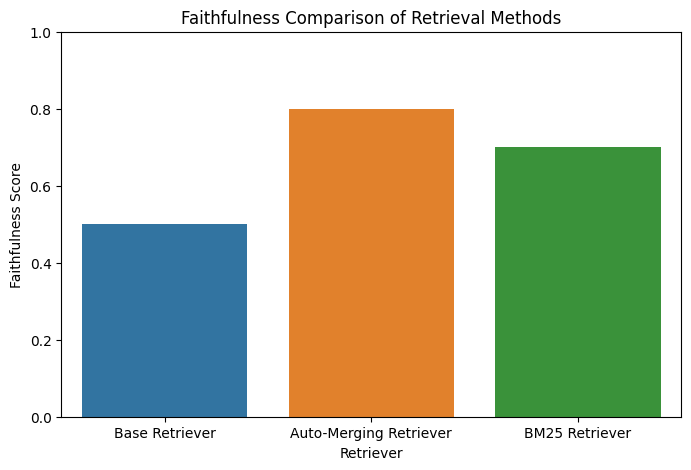


👑 Question 9: Semantic/contextual question: How do changes in barometric pressure influence migraines?
  📌 Base Retriever:  Changes in barometric pressure, which occur with fluctuations in the weather, may influence migraines. This is because atmospheric scientists are exploring ways to develop weather forecasting tools that could also predict the risk of a migraine attack or other chronic pain flare based on air pressure. (Source: International Journal of Biometeorology)
  📌 Auto-Merging Retriever:  Changes in barometric pressure, which occur with fluctuations in the weather, are a known trigger of migraines and contribute to pain severity. This is why atmospheric scientists are exploring ways to develop weather forecasting tools that could also predict the risk of a migraine attack or other chronic pain flare based on air pressure.
  📌 BM25 Retriever:  Changes in barometric pressure, which occur with fluctuations in the weather, are known triggers of migraines and contributors to pa

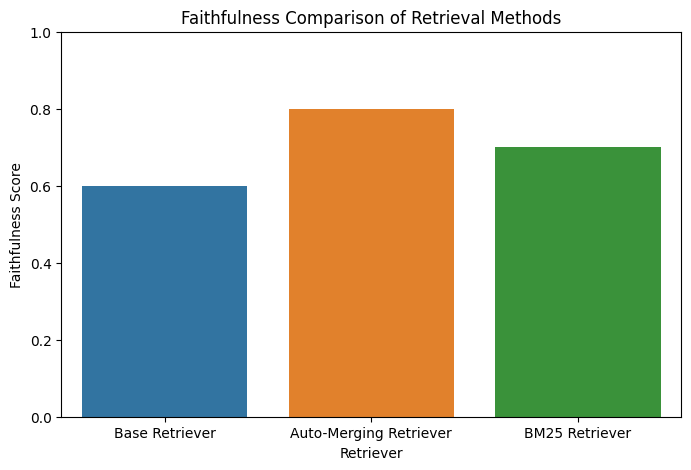


👑 Question 10: Semantic/contextual question: How can a phone app help predict migraines?
  📌 Base Retriever:  A phone app could potentially help predict migraines by allowing users to regularly report their mood, energy, stress levels, sleep quality, and headaches. The data collected could then be analyzed to identify patterns that might indicate an upcoming migraine attack, enabling users to take preventive measures or seek early treatment.
  📌 Auto-Merging Retriever:  A phone app could potentially help predict migraines by allowing users to track and report their mood, energy, stress levels, sleep quality, and headaches several times a day. This data can be analyzed to identify patterns and predict when a migraine attack might occur, enabling users to take preventive measures or treat the migraine early.
  📌 BM25 Retriever:  A phone app could potentially help predict migraines by allowing users to track and report their mood, energy, stress levels, sleep quality, and headaches sever

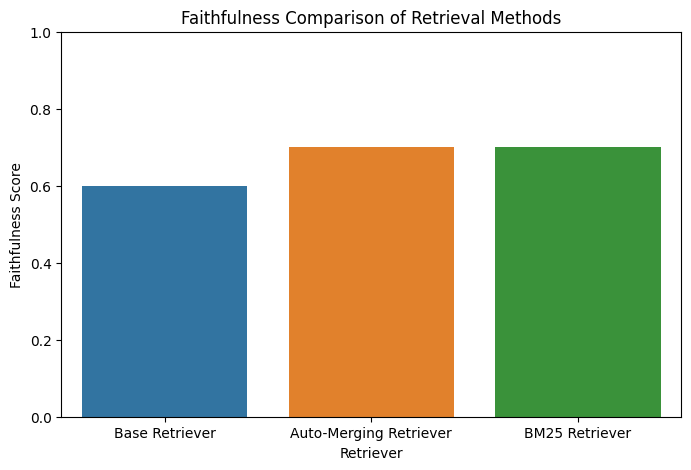

In [ ]:
# ✅ Modify Evaluation to Include Fusion Retriever
async def run_evaluation_test():
    eval_results = []

    print("\n✅ Test Question Response Comparison")

    for idx, query in enumerate(test_questions):
        # Retrieve responses from all four retrievers
        base_response = base_query_engine_sema.query(query)
        auto_response = auto_query_engine_sema.query(query)
        bm25_response = bm25_query_engine_sema.query(query)

        base_text = base_response.response
        auto_text = auto_response.response
        bm25_text = bm25_response.response

        print(f"\n👑 Question {idx+1}: {query}")
        print(f"  📌 Base Retriever: {base_text}")
        print(f"  📌 Auto-Merging Retriever: {auto_text}")
        print(f"  📌 BM25 Retriever: {bm25_text}")
        print("-" * 80)

        # Record the responses
        eval_results.append({
            "Query": query,
            "Base Retriever": base_text,
            "Auto-Merging Retriever": auto_text,
            "BM25 Retriever": bm25_text,
        })

        df_results = pd.DataFrame(eval_results)


        # Evaluate Faithfulness & Relevancy for each retriever
        eval_scores = []

        for query in test_questions:
            base_response = base_query_engine_sema.query(query)
            auto_response = auto_query_engine_sema.query(query)
            bm25_response = bm25_query_engine_sema.query(query)

            base_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=base_response)
            auto_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=auto_response)
            bm25_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=bm25_response)

            base_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=base_response)
            auto_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=auto_response)
            bm25_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=bm25_response)

            eval_scores.append({
                "Query": query,
                "Base Faithfulness": base_faithfulness.score,
                "Auto Faithfulness": auto_faithfulness.score,
                "BM25 Faithfulness": bm25_faithfulness.score,
                "Base Relevancy": base_relevancy.score,
                "Auto Relevancy": auto_relevancy.score,
                "BM25 Relevancy": bm25_relevancy.score,
            })

        df_scores = pd.DataFrame(eval_scores)

        # Compute means for comparison
        print("\n✅ Faithfulness Comparison")
        print(f"Base Retriever: {df_scores['Base Faithfulness'].mean():.4f}")
        print(f"Auto-Merging Retriever: {df_scores['Auto Faithfulness'].mean():.4f}")
        print(f"BM25 Retriever: {df_scores['BM25 Faithfulness'].mean():.4f}")

        print("\n✅ Relevancy Comparison")
        print(f"Base Retriever: {df_scores['Base Relevancy'].mean():.4f}")
        print(f"Auto-Merging Retriever: {df_scores['Auto Relevancy'].mean():.4f}")
        print(f"BM25 Retriever: {df_scores['BM25 Relevancy'].mean():.4f}")

        # ✅ Compute Precision / Recall / MRR / Hit Rate
        base_eval_results = await base_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)
        auto_eval_results = await auto_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)
        bm25_eval_results = await bm25_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)

        print("\n=== Retrieval Metrics Comparison ===")
        display_retriever_eval_results("Base Retriever", base_eval_results)
        display_retriever_eval_results("Auto-Merging Retriever", auto_eval_results)
        display_retriever_eval_results("BM25 Retriever", bm25_eval_results)

        # ✅ Visualize the output
        import matplotlib.pyplot as plt
        import seaborn as sns

        faithfulness_scores = {
            "Base Retriever": df_scores["Base Faithfulness"].mean(),
            "Auto-Merging Retriever": df_scores["Auto Faithfulness"].mean(),
            "BM25 Retriever": df_scores["BM25 Faithfulness"].mean()
        }
        df_faithfulness = pd.DataFrame(list(faithfulness_scores.items()), columns=["Retriever", "Faithfulness Score"])

        plt.figure(figsize=(8, 5))
        sns.barplot(data=df_faithfulness, x="Retriever", y="Faithfulness Score", hue="Retriever",
                    palette={"Base Retriever": "#1f77b4", "Auto-Merging Retriever": "#ff7f0e", "BM25 Retriever": "#2ca02c"},
                    legend=False)
        plt.title("Faithfulness Comparison of Retrieval Methods")
        plt.ylabel("Faithfulness Score")
        plt.xlabel("Retriever")
        plt.ylim(0, 1)
        plt.show()


# ✅ Execute Async Evaluation
asyncio.run(run_evaluation_test())

## Task 3: Extracting Information from Images

### 3.1 Code Implementation

In [ ]:
import pytesseract
from pdf2image import convert_from_path
from llama_index.core import Document

# ✅ Step 1: Extract text from images using OCR (Tesseract)
def extract_text_from_images(pdf_path):
    images = convert_from_path(pdf_path)
    ocr_texts = []

    for i, img in enumerate(images):
        text = pytesseract.image_to_string(img)
        if text.strip():
            ocr_texts.append(f"Page {i+1} OCR:\n{text}")

    return "\n\n".join(ocr_texts)

In [ ]:
# ✅ Step 2: Aggregate extracted text from all images
ocr_text = extract_text_from_images(webmd_pdf_path)

# ✅ Step 3: Convert OCR text into a Document object
ocr_document = Document(text=ocr_text)

# ✅ Step 4: Append OCR-extracted text to existing documents
webmd_documents.append(ocr_document)

In [ ]:
# ✅ Step 5: Run the RAG system to analyze performance
nodes_semantic = pipeline_semantic.run(documents=webmd_documents)

updated_query_engine = index_sema.as_query_engine()

async def run_evaluation_sema():
    eval_results = []

    for query in questions:
        response = updated_query_engine.query(query)
        response_text = response.response

        eval_results.append({
            "Query": query,
            "Response": response_text
        })

    df = pd.DataFrame(eval_results)

    # Evaluate retrieval effectiveness
    updated_retriever_eval = RetrieverEvaluator.from_metric_names(
        ["mrr", "hit_rate", "precision", "recall"],
        retriever=index_sema.as_retriever(similarity_top_k=3)
    )
    retriever_eval_results = await updated_retriever_eval.aevaluate_dataset(qa_dataset_sema)
    print("=== Retrieval Metrics Comparison ===")
    display_retriever_eval_results("OCR-Enhanced Retriever", retriever_eval_results)

    # Display results table
    display(df)

### 3.2 Printing Performance Data

In [ ]:
# ✅ Execute Async Evaluation
asyncio.run(run_evaluation_sema())

=== Retrieval Metrics Comparison ===
=== OCR-Enhanced Retriever ===
Mean:
 mrr          0.617647
hit_rate     0.823529
precision    0.274510
recall       0.823529
dtype: float64 



,Query,Response
0,Are there any non-medication treatments for mi...,"Yes, there are non-medication treatments for m..."
1,When should I not take VYEPTI?,You should not take VYEPTI if you are allergi...
2,What are the symptoms of Cluster?,The symptoms of Cluster headaches include:\n\...
3,If you have more than how many headache days p...,15 or more headache days per month


## Task 4: Implementing a Hybrid Retrieval Approach

### 4.1 Code Implementation

In [ ]:
# ✅ Step 1: Create BM25 and Vector-based Retrievers with Higher top-k
bm25_retriever_advanced = BM25Retriever.from_defaults(nodes=nodes_semantic, similarity_top_k=6, stemmer=Stemmer.Stemmer("english"), language="english")
vector_retriever_advanced = index_sema.as_retriever(similarity_top_k=6)


DEBUG:bm25s:Building index from IDs objects


In [ ]:
from llama_index.core.retrievers import QueryFusionRetriever
from llama_index.core.evaluation import RetrieverEvaluator
from llama_index.core.query_engine import RetrieverQueryEngine
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Step 2: Combine Retrieval Scores Using Weighted Fusion
# ✅ Step 3: Use Query Fusion Retriever to Merge Results
hybrid_retriever = QueryFusionRetriever(
    retrievers=[vector_retriever_advanced, bm25_retriever_advanced],
    retriever_weights=[0.6,0.4]
)

# ✅ Step 4: Create a hybrid query engine
hybrid_query_engine = RetrieverQueryEngine.from_args(retriever=hybrid_retriever)

In [ ]:
# ✅ Step 4: Execute Queries
queries = [
    "What does the figure on migraine risk factors illustrate?",
    "What are the symptoms of Cluster?",
    "If you have more than how many headache days per month you need to take a multipronged approach to treatment?"
]
for query in queries:
    response = hybrid_query_engine.query(query)
    print(f"❤ Query: {query}")
    print(f"🐕 Response: {response}\n")

❤ Query: What does the figure on migraine risk factors illustrate?
🐕 Response:  The figure on migraine risk factors illustrates the relationship between various factors such as age, sex, and family history, and the likelihood of developing migraines. It suggests that women are more likely to have migraines than men, and that the risk of developing migraines increases with age. Additionally, it shows that if a person has a family history of migraines, they are more likely to develop them as well.

❤ Query: What are the symptoms of Cluster?
🐕 Response:  The symptoms of Cluster headaches include:

1. Severe to very intense pain located in the orbital, supraorbital, and/or temporal regions.
2. Duration of 15-180 minutes.
3. Aggravating factors may include lacrimation (tearing), nasal congestion, rhinorrhea (runny nose), ptosis (drooping eyelid), and edema (swelling).
4. Restlessness/agitation may also be present.

❤ Query: If you have more than how many headache days per month you need to 

In [ ]:
# ✅ Step 5: Evaluate Hybrid Retrieval Performance
async def run_evaluation_compare():
    eval_results = []

    for query in queries:
        # Retrieve responses from all four retrievers
        base_response = base_query_engine_sema.query(query)
        auto_response = auto_query_engine_sema.query(query)
        bm25_response = bm25_query_engine_sema.query(query)
        hybrid_response = hybrid_query_engine.query(query)

        hybrid_text = hybrid_response.response
        base_text = base_response.response
        auto_text = auto_response.response
        bm25_text = bm25_response.response


        # Evaluate Faithfulness & Relevancy for each retriever
        base_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=base_response)
        auto_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=auto_response)
        bm25_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=bm25_response)
        hybrid_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=hybrid_response)

        hybrid_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=hybrid_response)
        base_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=base_response)
        auto_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=auto_response)
        bm25_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=bm25_response)

        eval_results.append({
            "Query": query,
            "Base Response": base_text,
            "Auto-Merged Response": auto_text,
            "BM25 Response": bm25_text,
            "Hybrid Response": hybrid_text,
            "Base Faithfulness": base_faithfulness.score,
            "Auto Faithfulness": auto_faithfulness.score,
            "BM25 Faithfulness": bm25_faithfulness.score,
            "Hybrid Faithfulness": hybrid_faithfulness.score,
            "Base Relevancy": base_relevancy.score,
            "Auto Relevancy": auto_relevancy.score,
            "BM25 Relevancy": bm25_relevancy.score,
            "Hybrid Relevancy": hybrid_relevancy.score
        })

    df = pd.DataFrame(eval_results)


    # Define retriever evaluators
    hybrid_retriever_evaluator = RetrieverEvaluator.from_metric_names(["mrr", "hit_rate", "precision", "recall"], retriever=hybrid_retriever)

    # Compute means for comparison
    print("\n✅ Faithfulness Comparison")
    print(f"Base Retriever: {df['Base Faithfulness'].mean():.4f}")
    print(f"Auto-Merging Retriever: {df['Auto Faithfulness'].mean():.4f}")
    print(f"BM25 Retriever: {df['BM25 Faithfulness'].mean():.4f}")
    print(f"Hybrid Retriever: {df['Hybrid Faithfulness'].mean():.4f}")

    print("\n✅ Relevancy Comparison")
    print(f"Base Retriever: {df['Base Relevancy'].mean():.4f}")
    print(f"Auto-Merging Retriever: {df['Auto Relevancy'].mean():.4f}")
    print(f"BM25 Retriever: {df['BM25 Relevancy'].mean():.4f}")
    print(f"Hybrid Retriever: {df['Hybrid Relevancy'].mean():.4f}")

    # Evaluate all retrievers on the QA dataset
    base_eval_results = await base_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)
    auto_eval_results = await auto_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)
    bm25_eval_results = await bm25_retriever_evaluator_sema.aevaluate_dataset(qa_dataset_sema)
    hybrid_eval_results = await hybrid_retriever_evaluator.aevaluate_dataset(qa_dataset_sema)

    print("=== Retrieval Metrics Comparison ===")
    display_retriever_eval_results("Base Retriever", base_eval_results)
    display_retriever_eval_results("Auto-Merging Retriever", auto_eval_results)
    display_retriever_eval_results("BM25 Retriever", bm25_eval_results)
    display_retriever_eval_results("Hybrid Retriever", hybrid_eval_results)

    # Display results table
    displayify_df(df)



### 4.2 Visulaize the performance

In [ ]:
# ✅ Execute Async Evaluation
asyncio.run(run_evaluation_compare())


✅ Faithfulness Comparison
Base Retriever: 0.3333
Auto-Merging Retriever: 0.3333
BM25 Retriever: 0.3333
Hybrid Retriever: 0.6667

✅ Relevancy Comparison
Base Retriever: 0.6667
Auto-Merging Retriever: 1.0000
BM25 Retriever: 0.6667
Hybrid Retriever: 0.6667
=== Retrieval Metrics Comparison ===
=== Base Retriever ===
Mean:
 mrr          0.411765
hit_rate     0.411765
precision    0.411765
recall       0.411765
dtype: float64 

=== Auto-Merging Retriever ===
Mean:
 mrr          0.617647
hit_rate     0.823529
precision    0.264706
recall       0.823529
dtype: float64 

=== BM25 Retriever ===
Mean:
 mrr          0.411765
hit_rate     0.529412
precision    0.264706
recall       0.529412
dtype: float64 

=== Hybrid Retriever ===
Mean:
 mrr          0.441176
hit_rate     0.529412
precision    0.264706
recall       0.529412
dtype: float64 



,Query,Base Response,Auto-Merged Response,BM25 Response,Hybrid Response,Base Faithfulness,Auto Faithfulness,BM25 Faithfulness,Hybrid Faithfulness,Base Relevancy,Auto Relevancy,BM25 Relevancy,Hybrid Relevancy
0,What does the figure on migraine risk factors illustrate?,"The figure on migraine risk factors illustrates various factors that can contribute to the occurrence of migraines, such as changes in barometric pressure, sleep quality, energy levels, stress levels, and stigma associated with the condition.","The figure illustrates various comorbidities (conditions that often occur together) that are associated with chronic migraine. These include mood disorders, sleep disorders, cardiovascular disorders, inflammatory conditions, neurological disorders, chronic pain, and gastrointestinal issues.","The figure on migraine risk factors illustrates the relationship between certain factors such as sleep, energy, stress levels, and the likelihood of experiencing a migraine attack. It suggests that poor sleep overall, poor sleep the night before, or low energy the day before may increase the risk of morning migraine attacks, while higher-than-usual energy levels and stress may increase the risk of afternoon and evening attacks.","The figure on migraine risk factors illustrates the relationship between certain factors such as sleep quality, energy levels, stress, and the likelihood of experiencing a migraine attack. It suggests that poor sleep overall, poor sleep the night before, or low energy the day before may increase the risk of morning migraine attacks, while higher-than-usual energy levels and stress may increase the risk of afternoon and evening attacks.",0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1,What are the symptoms of Cluster?,"The symptoms of Cluster headaches include: 1. Unilateral location (affecting one side) 2. Orbital, supraorbital, and/or temporal pain 3. Severe to very severe intensity 4. Duration of 15-180 minutes 5. Lacrimation (tearing) 6. Nasal congestion 7. Rhinorrhea (runny nose) 8. Ptosis and/or eyelid edema (drooping eyelid and swelling) 9. Restlessness/agitation 10. Nausea 11. Vomiting 12. Photophobia (sensitivity to light) 13. Phonophobia (sensitivity to sound)","The symptoms of Cluster headache include: 1. Unilateral (one-sided) location 2. Severe to very intense pain, often described as orbital, supraorbital, and/or temporal 3. Duration of 15-180 minutes 4. Aggravating factors may include lacrimation, nasal congestion, rhinorrhea, ptosis and/or eyelid edema, restlessness/agitation, nausea, and vomiting. 5. Pulsating or pressing/tightening pain 6. May also include photophobia (sensitivity to light) and phonophobia (sensitivity to sound) These symptoms are not exhaustive and may vary from person to person. If you or someone you know is experiencing these symptoms, it is important to consult a healthcare professional for proper diagnosis and treatment.","Cluster headaches are characterized by the following symptoms: 1. Unilateral (one-sided) pain: The pain is typically located around the eye or the temple area on one side of the head. 2. Orbital or supraorbital pain: The pain may feel like it is behind the eye or above the eye. 3. Severe to very severe intensity: The pain is often described as severe and can be debilitating. 4. Duration: Cluster headaches usually last between 15 minutes to 3 hours, but clusters of headaches can last for weeks or months. 5. Aggravating symptoms: Cluster headaches may be accompanied by other symptoms such as lacrimation (tearing), nasal congestion, rhinorrhea (runny nose), ptosis (drooping eyelid), eyelid edema (swelling), restlessness, and agitation.","Cluster headaches are characterized by the following symptoms: 1. Unilateral (one-sided) pain: The pain is typically located around the eye, temple, or forehead on one side of the head. 2. Orbital, supraorbital, or temporal severe pain: The pain can be intense and may feel like it is behind the e

## Task 5: Let’s make our RAG even better!

### 5.1 Implementing noise reduction in OCR retrieval

In [31]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 44.4 MB/s eta 0:00:00


In [37]:
import re
from typing import List
from spellchecker import SpellChecker
from transformers import pipeline
import unicodedata

class OCRPostProcessor:
    def __init__(self):
        # Initialize each processing module
        self.spell = SpellChecker()
        self.ocr_corrector = pipeline(
            "text2text-generation",
            model="oliverguhr/spelling-correction-english"
        )
        # Custom OCR common error replacement rules
        self.ocr_replace_rules = {
            r'\b([Il])([mn])\b': r'I\2',
            r'(\w)-\s+(\w)': r'\1\2',
            r'\b([A-Z])\s+([A-Z])\b': r'\1\2',
            r'\b(\w+)�+(\w*)\b': self._handle_special_chars
        }

    def _handle_special_chars(self, match):
        word = match.group(0).replace('�', '')
        candidates = self.spell.candidates(word)
        return candidates.pop() if candidates else word

    def _correct_layout(self, text: str) -> str:
        text = re.sub(r'-\s*\n\s*', '', text)
        text = re.sub(r'(?<!\n)\n(?!\n)', ' ', text)
        return text

    def _apply_replace_rules(self, text: str) -> str:
        for pattern, replacement in self.ocr_replace_rules.items():
            if callable(replacement):
                text = re.sub(pattern, replacement, text)
            else:
                text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
        return text

    def _correct_typos(self, text: str) -> str:
        words = text.split()
        corrected = []
        for word in words:
            if re.search(r'\d|[\W_]', word):
                corrected.append(word)
                continue
            correction = self.spell.correction(word)
            corrected.append(correction if correction else word)
        return ' '.join(corrected)

    def _context_aware_correction(self, text: str) -> str:
        if len(text) < 5:
            return text
        corrected = self.ocr_corrector(
            f"fix typos: {text}",
            max_length=512,
            num_return_sequences=1
        )[0]['generated_text']
        return corrected.strip()

    def process(self, text: str,
               aggressive: bool = False) -> str:
        # 1. Normalize text
        text = unicodedata.normalize('NFKC', text)

        # 2. Fix layout issues
        text = self._correct_layout(text)

        # 3. Apply custom replacement rules
        text = self._apply_replace_rules(text)

        # 4. Perform basic spelling check
        text = self._correct_typos(text)

        # 5. Apply context-aware typo correction
        if aggressive:
            text = self._context_aware_correction(text)

        return text

In [39]:
def enhanced_ocr_pipeline(image_path: str) -> str:
    raw_text = extract_text_from_images(webmd_pdf_path)
    cleaner = OCRPostProcessor()

    # Clean the OCR output
    cleaned_text = cleaner.process(raw_text)
    if len(cleaned_text.split()) < 20:
        cleaned_text = cleaner.process(cleaned_text, aggressive=True)

    return cleaned_text

In [44]:
# Convert PDF to Image
images = convert_from_path(webmd_pdf_path)

# # Create a folder to save the pictures
output_dir = "./pdf_images"
os.makedirs(output_dir, exist_ok=True)

image_paths = []
for i, img in enumerate(images):
    img_path = os.path.join(output_dir, f"page_{i+1}.png")
    img.save(img_path, "PNG")
    image_paths.append(img_path)

processed_texts = [enhanced_ocr_pipeline(img_path) for img_path in image_paths]
nodes_semantic = [Document(text=t) for t in processed_texts]


bm25_retriever_advanced = BM25Retriever.from_defaults(nodes=nodes_semantic, similarity_top_k=6, stemmer=Stemmer.Stemmer("english"), language="english")
vector_retriever_advanced = index_sema.as_retriever(similarity_top_k=6)

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
DEBUG:bm25s:Building index from IDs objects


### 5.2 Implementing a second-stage ranking mechanism

In [45]:
from llama_index.core.postprocessor import SentenceTransformerRerank

# Adjust top k value
hybrid_retriever = QueryFusionRetriever(
    retrievers=[vector_retriever_advanced, bm25_retriever_advanced],
    retriever_weights=[0.7, 0.3],
    similarity_top_k=3
)

# Use lightweight BGE reranker model to improve ranking quality
reranker = SentenceTransformerRerank(
    top_n=3,
    model="BAAI/bge-reranker-base"
)

In [46]:
# Update hybrid engine by reranker
hybrid_query_engine = RetrieverQueryEngine.from_args(
    retriever=hybrid_retriever,
    node_postprocessors=[reranker]
)

### 5.3 Printing the Performance Data

In [47]:

# Evaluate Hybrid Retrieval Performance
async def run_evaluation_hybrid():
    eval_results = []

    for query in queries:
        hybrid_response = hybrid_query_engine.query(query)
        hybrid_text = hybrid_response.response

        # Evaluate Faithfulness & Relevancy
        hybrid_faithfulness = faithfulness_evaluator_sema.evaluate_response(response=hybrid_response)
        hybrid_relevancy = relevancy_evaluator_sema.evaluate_response(query=query, response=hybrid_response)

        eval_results.append({
            "Query": query,
            "Hybrid Response": hybrid_text,
            "Hybrid Faithfulness": hybrid_faithfulness.score,
            "Hybrid Relevancy": hybrid_relevancy.score
        })

    df = pd.DataFrame(eval_results)

    # Update the hybrid retriever evaluator
    hybrid_retriever_evaluator = RetrieverEvaluator.from_metric_names(
        ["mrr", "hit_rate", "precision", "recall"],
        retriever=hybrid_retriever
    )

    # Compute means for comparison
    print("\n✅ Faithfulness")
    print(f"Hybrid Retriever: {df['Hybrid Faithfulness'].mean():.4f}")

    print("\n✅ Relevancy")
    print(f"Hybrid Retriever: {df['Hybrid Relevancy'].mean():.4f}")

    # Evaluate all retrievers on the QA dataset
    hybrid_eval_results = await hybrid_retriever_evaluator.aevaluate_dataset(qa_dataset_sema)

    print("\n=== Retrieval Metrics ===")
    display_retriever_eval_results("Hybrid Retriever", hybrid_eval_results)

    # Display results table
    displayify_df(df)

In [49]:
# ✅ Execute Async Evaluation
asyncio.run(run_evaluation_hybrid())


✅ Faithfulness
Hybrid Retriever: 0.6667

✅ Relevancy
Hybrid Retriever: 0.6667

=== Retrieval Metrics ===
=== Hybrid Retriever ===
Mean:
 mrr          0.607843
hit_rate     0.764706
precision    0.254902
recall       0.764706
dtype: float64 



,Query,Hybrid Response,Hybrid Faithfulness,Hybrid Relevancy
0,What does the figure on migraine risk factors illustrate?,"The figure on migraine risk factors illustrates the relationship between certain factors such as sleep quality, energy levels, stress, and the likelihood of experiencing a migraine attack in the morning or afternoon/evening. It is based on a study where 477 people with migraine reported their mood, energy, stress levels, sleep quality, and headaches on an app several times a day for 2 weeks.",1.000000,1.000000
1,What are the symptoms of Cluster?,The provided context does not mention any information about Cluster headaches or their symptoms.,0.000000,0.000000
2,If you have more than how many headache days per month you need to take a multipronged approach to treatment?,A multipronged approach to treatment may be advantageous for individuals experiencing 15 or more headache days per month.,1.000000,1.000000
